# Installings

In [149]:
! pip install bs4

Defaulting to user installation because normal site-packages is not writeable


In [150]:
! pip install ace-tools

^C


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
! pip install selenium

In [ ]:
! pip install webdriver_manager

In [ ]:
! pip install yfinance

In [ ]:
! pip install lxml

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 688.0 kB/s eta 0:00:05
   ----- ---------------------------------- 0.5/3.8 MB 688.0 kB/s eta 0:00:05
   ----- ---------------------------------- 0.5/3.8 MB 688.0 kB/s eta 0:00:05
   -------- ------------------------------- 0.8/3.8 MB 581.1 kB/s eta 0:00:06
   -------- ------------------------------- 0.8/3.8 MB 581.1 kB/s eta 0:00:06
   ---------- ----------------------------- 1.0/3.8 MB 598.9 kB/s eta 0:00:05
   ------------- -------------------------- 1.3/3.8 MB 658.9 kB/s eta 0:00:04
   ------------- -------------------------- 1.3/3.8 MB 658.9 kB/s eta 0:00:04
   ---------------- ----------------------- 1.6/3.8 MB 665.6 kB/s eta 0:00:04
   ----------

In [ ]:
! pip install apache-airflow

# EMAIL NASDAQ AUTOMATION

## NASDAQ PE RATIO

### NASDAQ PE RATIO GRAPH

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import base64

# Set up Selenium options
options = Options()
options.headless = True  # Run Chrome in headless mode
driver = webdriver.Chrome(options=options)

# Access the page
driver.get("https://www.gurufocus.com/economic_indicators/6778/nasdaq-100-pe-ratio")
time.sleep(5)  # Let the page load fully

# Locate the canvas (assuming it's the only one)
canvas = driver.find_element("tag name", "canvas")

# Extract canvas as base64 image
canvas_base64 = driver.execute_script("""
    const canvas = arguments[0];
    return canvas.toDataURL('image/png').substring(22);  // remove "data:image/png;base64,"
""", canvas)

# Decode and save or print (for demonstration, we'll save it as a file)
with open("canvas_capture.png", "wb") as f:
    f.write(base64.b64decode(canvas_base64))

print("Canvas image saved as 'canvas_capture.png'.")

driver.quit()


Canvas image saved as 'canvas_capture.png'.


In [2]:
image_path = 'canvas_capture.png'

### NASDAQ PE RATIO INDICATORS

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Setup
options = Options()
options.headless = False
driver = webdriver.Chrome(options=options)
wait = WebDriverWait(driver, 10)

# Open the page
driver.get("https://www.gurufocus.com/economic_indicators/6778/nasdaq-100-pe-ratio")
time.sleep(5)

# Hover to activate tooltip
indicator = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "cur-indicator")))
ActionChains(driver).move_to_element(indicator).perform()

# Wait for a tooltip with aria-hidden="false"
tooltip = wait.until(
    EC.presence_of_element_located(
        (By.XPATH, "//div[@role='tooltip' and @aria-hidden='false']")
    )
)

# Extract data
rows = tooltip.find_elements(By.CLASS_NAME, "el-row")
data = {}
for row in rows:
    spans = row.find_elements(By.TAG_NAME, "span")
    if len(spans) == 2:
        key = spans[0].text.strip().replace(":", "")
        val = spans[1].text.strip()
        data[key] = val

# Output
print("Extracted Tooltip Data:")
for k, v in data.items():
    print(f"{k}: {v}")

driver.quit()


Extracted Tooltip Data:
Current: 37.97
YoY: 19.3%
Max: 41.57
Min: 10.71
Average: 24.34
Typical: 18.72 ~ 29.96


In [4]:
print(data)
print(data['Current'])

{'Current': '37.97', 'YoY': '19.3%', 'Max': '41.57', 'Min': '10.71', 'Average': '24.34', 'Typical': '18.72 ~ 29.96'}
37.97


### NASDAQ Sigma

[50, 80, 155, 230, 268, 305, 380, 456, 467, 532]


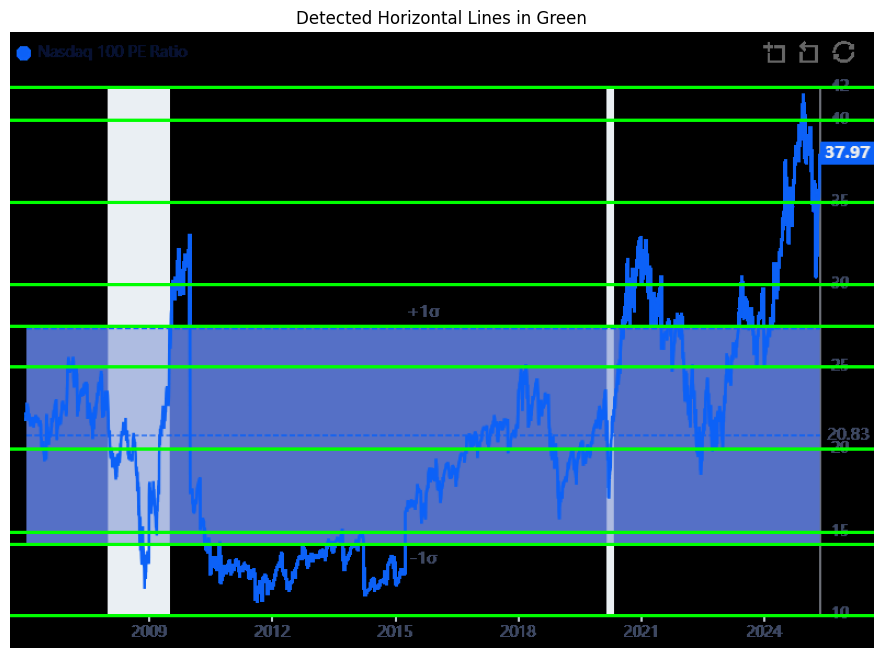

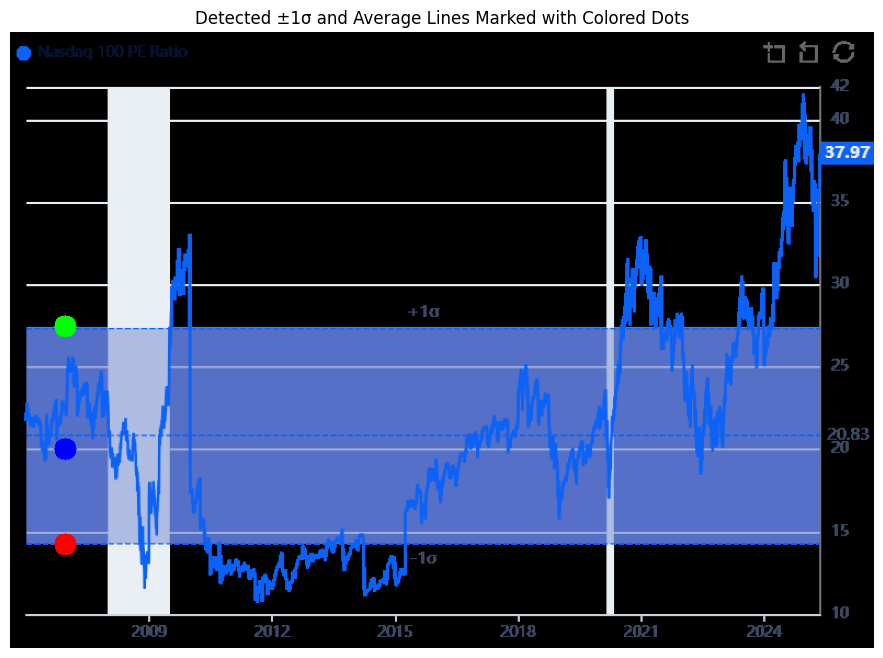

Line  Y Position (px)  Value Estimate  Δ from Avg
0      +1σ              268       27.526971    7.435685
1  Average              380       20.091286    0.000000
2      -1σ              467       14.315353   -5.775934

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


# Load the image
image_path = "canvas_capture.png"
image = cv2.imread(image_path)

# Convert to grayscale for line detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=200, maxLineGap=10)

# Prepare image for plotting detected lines
line_image = image.copy()
line_positions = []

# Filter and draw horizontal lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    if abs(y1 - y2) < 2:  # horizontal lines
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        line_positions.append(y1)

# Sort and deduplicate line y-positions
line_positions = sorted(set(line_positions))

def cluster_positions(positions, threshold=5):
    clustered = []
    positions = sorted(positions)
    cluster = [positions[0]]

    for pos in positions[1:]:
        if pos - cluster[-1] <= threshold:
            cluster.append(pos)
        else:
            clustered.append(int(np.mean(cluster)))
            cluster = [pos]
    clustered.append(int(np.mean(cluster)))
    return clustered

line_positions = cluster_positions(line_positions)
print(line_positions)

# Extract the value-per-pixel scale using vertical spacing and known values from axis
# Approximate values visible from the image:
# 42 (top line) to 10 (bottom line) across the pixel height
# Assume these indexes per your suggestion
y_plus_sigma = line_positions[4]   # sigma+
y_avg = line_positions[6]          # average (adjusted from your example)
y_minus_sigma = line_positions[8]  # sigma-
top_value = 42
bottom_value = 10
top_y = min(line_positions)
bottom_y = max(line_positions)

# Calculate value per pixel
value_per_pixel = (top_value - bottom_value) / (bottom_y - top_y)

# Convert to actual values
avg_value = top_value - (y_avg - top_y) * value_per_pixel
plus_sigma_value = top_value - (y_plus_sigma - top_y) * value_per_pixel
minus_sigma_value = top_value - (y_minus_sigma - top_y) * value_per_pixel

####################
# Draw detected horizontal lines on a copy of the image
image_with_lines = image.copy()
for y in line_positions:
    cv2.line(image_with_lines, (0, y), (image.shape[1], y), (0, 255, 0), 2)

# Convert BGR to RGB for matplotlib display
image_rgb = cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB)

# Show the image with detected lines
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title("Detected Horizontal Lines in Green")
plt.axis('off')
plt.show()

# Create a copy to draw points
image_points = image.copy()

# Define colors in BGR for the points
colors = {
    'Average': (255, 0, 0),      # Blue
    '+1σ': (0, 255, 0),          # Green
    '-1σ': (0, 0, 255)           # Red
}

# Draw circles on the detected lines
cv2.circle(image_points, (50, line_positions[6]), 10, colors['Average'], -1)
cv2.circle(image_points, (50, line_positions[4]), 10, colors['+1σ'], -1),
cv2.circle(image_points, (50, line_positions[8]), 10, colors['-1σ'], -1)

# Convert to RGB for displaying
image_points_rgb = cv2.cvtColor(image_points, cv2.COLOR_BGR2RGB)

# Show the image with points
plt.figure(figsize=(12, 8))
plt.imshow(image_points_rgb)
plt.title("Detected ±1σ and Average Lines Marked with Colored Dots")
plt.axis('off')
plt.show()
#######################


# Calculate σ
sigma = abs(plus_sigma_value - avg_value)

# Create the DataFrame again now that pandas is imported
df = pd.DataFrame({
    "Line": ["+1σ", "Average", "-1σ"],
    "Y Position (px)": [y_plus_sigma, y_avg, y_minus_sigma],
    "Value Estimate": [plus_sigma_value, avg_value, minus_sigma_value],
    "Δ from Avg": [plus_sigma_value - avg_value, 0, minus_sigma_value - avg_value]
})

df.head()


In [6]:
sigma = df['Value Estimate']
print(sigma)
print(sigma[0])
sigma_plus = float(round(float(sigma[0]),2))
sigma_avg = float(round(float(sigma[1]),2))
sigma_low = float(round(float(sigma[2]),2))
print(sigma_plus)

0    27.526971
1    20.091286
2    14.315353
Name: Value Estimate, dtype: float64
27.526970954356848
27.53


## NASDAQ and Closing NDX

In [7]:
import yfinance as yf

# NDX (Nasdaq-100)
ndx = yf.Ticker("^NDX")
ndx_close = ndx.history(period="1d")["Close"].iloc[-1]

# NASDAQ Composite
nasdaq = yf.Ticker("^IXIC")
nasdaq_close = nasdaq.history(period="1d")["Close"].iloc[-1]

nasdaq_close_rounded = round(nasdaq_close, 3)
ndx_close_rounded = round(ndx_close, 3)

print("NDX Closing:", float(ndx_close))
print("NASDAQ Composite Closing:", float(nasdaq_close))

NDX Closing: 21427.935546875
NASDAQ Composite Closing: 19211.1015625


## Creating tables

In [8]:
import pandas as pd
import numpy as np

# Define the fixed border values:
g_values = [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]  # left column (growth)
Ke_values = [0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14]      # top row (cost of equity)

# Create empty DataFrame with indexes and columns
df = pd.DataFrame(index=[f"{g*100:.1f}%" for g in g_values],
                  columns=[f"{Ke*100:.1f}%" for Ke in Ke_values])

# Calculate the formula for each cell
for g in g_values:
    for Ke in Ke_values:
        if Ke <= g:
            df.loc[f"{g*100:.1f}%", f"{Ke*100:.1f}%"] = np.nan  # Avoid division by zero or negative denominator
        else:
            value = (1 + g) / (Ke - g)
            df.loc[f"{g*100:.1f}%", f"{Ke*100:.1f}%"] = round(value, 1)

print(df)
df_pe_given_kg = df

        8.0%   9.0%  10.0%  11.0% 12.0% 13.0% 14.0%
3.0%    20.6   17.2   14.7   12.9  11.4  10.3   9.4
4.0%    26.0   20.8   17.3   14.9  13.0  11.6  10.4
5.0%    35.0   26.3   21.0   17.5  15.0  13.1  11.7
6.0%    53.0   35.3   26.5   21.2  17.7  15.1  13.2
7.0%   107.0   53.5   35.7   26.8  21.4  17.8  15.3
8.0%     NaN  108.0   54.0   36.0  27.0  21.6  18.0
9.0%     NaN    NaN  109.0   54.5  36.3  27.2  21.8
10.0%    NaN    NaN    NaN  110.0  55.0  36.7  27.5


In [9]:
import pandas as pd

# Hardcoded values for the first two columns
# pe_values = [float(data['Min']), sigma_low, sigma_avg, sigma_plus, float(data['Current']), float(data['Max'])]
pe_values = [17.5, 18.8, 21.2, 26.8, 35.7, 36]
impl_g_values = [0.05, 0.054, 0.06, 0.07, 0.08, 0.08]

# Calculate Drawdown and NDX100 columns
drawdown = [(pe / float(data['Current'])) - 1 for pe in pe_values]
ndx100 = [float(ndx_close) * (1 + dd) for dd in drawdown]

# Build the DataFrame
df = pd.DataFrame({
    'PE': pe_values,
    'Impl. g': [f"{g*100:.1f}%" for g in impl_g_values],  # formatting as percent string
    'Drawdown': [f"{dd*100:.0f}%" for dd in drawdown],    # formatting as percent string
    'NDX100': [f"{val:,.0f}" for val in ndx100]           # formatted with thousand separator, no decimals
})

print(df)
df_implied_growth=df


     PE Impl. g Drawdown  NDX100
0  17.5    5.0%     -54%   9,876
1  18.8    5.4%     -50%  10,610
2  21.2    6.0%     -44%  11,964
3  26.8    7.0%     -29%  15,124
4  35.7    8.0%      -6%  20,147
5  36.0    8.0%      -5%  20,316


## Building the HTML

### Tables

In [10]:
# For simplicity and exact match, highlight the cells at (5%,10%), (5%,11%), (6%,10%), (6%,11%), (7%,10%), (7%,11%), (7%,12%), (8%,10%), (8%,11%), (8%,12%)
highlight_coords = {
    ("5.0%", "10.0%"),
    ("5.0%", "11.0%"),
    ("5.0%", "12.0%"),
    ("6.0%", "10.0%"),
    ("6.0%", "11.0%"),
    ("6.0%", "12.0%"),
    ("7.0%", "10.0%"),
    ("7.0%", "11.0%"),
    ("7.0%", "12.0%"),
    ("8.0%", "10.0%"),
    ("8.0%", "11.0%"),
    ("8.0%", "12.0%"),
}
##

tables = '''
<html>
<head>
<style>
  table {
    border-collapse: collapse;
  }
  #tables th, td {
    border: 1px solid white;
    text-align: center;
    font-family: Arial, sans-serif;
    padding: 6px 10px;
  }
  #tables th {
    background-color: #eee;
  }
  .highlight {
    background-color: #fff166;
  }
  .semi-highlight {
    background-color: #fff7a6;
  }
  caption {
    font-weight: bold;
    font-size: 16px;
    margin-bottom: 10px;
  }
</style>
</head>
<body>
'''

# Usar tabela para layout lado a lado
tables += '''
<table id="tables" role="presentation" width="100%" cellspacing="0" cellpadding="10" border="0" style="table-layout: fixed;">
  <tr>
    <td width="50%" valign="top" style="padding-right:10px;">
'''

# Montar primeira tabela dentro da célula
tables += '<table id="table_1" width="100%"><caption>Nasdaq PE given Ke and Growth Assumptions</caption>'

tables += '<tr><th>g / Ke</th>'
for col in df_pe_given_kg.columns:
    tables += f'<th>{col}</th>'
tables += '</tr>'

for idx in df_pe_given_kg.index:
    tables += f'<tr><th>{idx}</th>'
    for col in df_pe_given_kg.columns:
        cell_value = df_pe_given_kg.loc[idx, col]
        if (idx, col) in highlight_coords:
            if(col=="11.0%"):
              tables += f'<td class="semi-highlight">{cell_value}</td>'
            else: 
              tables += f'<td class="highlight">{cell_value}</td>'
        else:
            tables += f'<td>{cell_value}</td>'
    tables += '</tr>'
tables += '</table>'

tables += '''
    </td>
    <td width="50%" valign="top" style="padding-left:10px;">
'''

# Montar segunda tabela dentro da célula
tables += '<table id="table_2" width="100%"><caption>Nasdaq Drawdown Given Implied Growth Assumptions</caption>'

tables += '<tr>'
for col in df_implied_growth.columns:
    tables += f'<th>{col}</th>'
tables += '</tr>'

for idx, row in df_implied_growth.iterrows():
    if idx == 3:
        tables += '<tr class="highlight">'
    else:
        tables += '<tr>'
    for col in df_implied_growth.columns:
        tables += f'<td>{row[col]}</td>'
    tables += '</tr>'

tables += '</table>'

tables += '''
    </td>
  </tr>
</table>
</body>
</html>
'''

print(tables)



<html>
<head>
<style>
  table {
    border-collapse: collapse;
  }
  #tables th, td {
    border: 1px solid white;
    text-align: center;
    font-family: Arial, sans-serif;
    padding: 6px 10px;
  }
  #tables th {
    background-color: #eee;
  }
  .highlight {
    background-color: #fff166;
  }
  .semi-highlight {
    background-color: #fff7a6;
  }
  caption {
    font-weight: bold;
    font-size: 16px;
    margin-bottom: 10px;
  }
</style>
</head>
<body>

<table id="tables" role="presentation" width="100%" cellspacing="0" cellpadding="10" border="0" style="table-layout: fixed;">
  <tr>
    <td width="50%" valign="top" style="padding-right:10px;">
<table id="table_1" width="100%"><caption>Nasdaq PE given Ke and Growth Assumptions</caption><tr><th>g / Ke</th><th>8.0%</th><th>9.0%</th><th>10.0%</th><th>11.0%</th><th>12.0%</th><th>13.0%</th><th>14.0%</th></tr><tr><th>3.0%</th><td>20.6</td><td>17.2</td><td>14.7</td><td>12.9</td><td>11.4</td><td>10.3</td><td>9.4</td></tr><tr><th>4.0%</t

### Building NASDAQ Infos

In [11]:
from datetime import datetime

def build_nasdaq_html(data, sigma_plus, sigma_low, sigma_avg, ndx_close, nasdaq_close):
    today_str = datetime.now().strftime("%B %d, %Y")
    
    ndx_close_rounded = f"{ndx_close:,.2f}"
    nasdaq_close_rounded = f"{nasdaq_close:,.2f}"
    
    html = f'''
    <!DOCTYPE html>
    <html lang="en">
    <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <title>Nasdaq Update - {today_str}</title>
    <style>
      body {{
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        background-color: #f8f9fa;
        color: #333;
        margin: 20px;
        padding: 0;
      }}
      .container {{
        max-width: 600px;
        background: white;
        margin: auto;
        padding: 25px 30px;
        border-radius: 8px;
        box-shadow: 0 2px 8px rgb(0 0 0 / 0.1);
      }}
      p {{
        font-size: 1rem;
        line-height: 1.5;
        margin: 10px 0 20px;
      }}
      table.layout {{
        width: 100%;
        border-collapse: collapse;
      }}
      td {{
        border: 1px solid white;
        vertical-align: top;
        padding: 0 15px 0 0;
      }}
      ul {{
        list-style-type: none;
        padding-left: 0;
        margin-top: 0;
        text-align: start;
      }}
      ul ul {{
        padding-left: 20px;
        list-style-type: disc;
        margin-top: 0;
      }}
      li {{
        margin-bottom: 10px;
        font-weight: 600;
        text-align: start;
      }}
      li ul li {{
        text-align: start;
        font-weight: normal;
        margin-bottom: 5px;
      }}
    </style>
    </head>
    <body>
      <div class="container">
        <p>Hi team,</p>
        <p>Here are the latest closing values for {today_str}:</p>

        <table class="layout">
          <tr>
            <td>
              <ul style="list-style-type:none;">
                <li><b>NASDAQ PE Ratio:</b>
                  <ul style="list-style-type:none;">
                    <li>Current: {data['Current']}</li>
                    <li>YoY: {data['YoY']}</li>
                    <li>Sigma+: {sigma_plus:.2f}</li>
                    <li>Sigma-: {sigma_low:.2f}</li>
                    <li>Sigma_avg: {sigma_avg:.2f}</li>
                    <li>Historical - Max: {data['Max']} - Min: {data['Min']}</li>
                  </ul>
                </li>
              </ul>
            </td>
            <td>
              <ul style="list-style-type:none;">
                <li><b>NDX (Nasdaq-100):</b> {ndx_close_rounded}</li>
                <li><b>NASDAQ Composite:</b> {nasdaq_close_rounded}</li>
              </ul>
            </td>
          </tr>
        </table>

      </div>
    </body>
    </html>
    '''
    return html

html_content = build_nasdaq_html(data, sigma_plus, sigma_low, sigma_avg, ndx_close_rounded, nasdaq_close_rounded)

with open("nasdaq_report.html", "w", encoding="utf-8") as f:
    f.write(html_content)


## Send the e-mail

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from datetime import datetime

times_above_sigma = float(data['Current'])/float(sigma_plus)
times_above_sigma_rounded = round(times_above_sigma, 2)
percentage_of_difference = (1-(float(sigma_plus)/float(data['Current'])))*100
percentage_of_difference_rounded = f"{round(percentage_of_difference, 2)}%"

sender_email = "rafael@xcap.vc"
receiver_email = ["arezende@xcap.vc", "christian@xcap.vc", "bernardo@xcap.vc", "gustavo@xcap.vc", "jonathan@xcap.vc", "leonardo@xcap.vc", "jose@xcap.vc"]
# receiver_email = ["arezende@xcap.vc"]
# receiver_email = ["rafa.tamasi@usp.br"]
your_name = "Rafael"
today_str = datetime.today().strftime("%B %d, %Y")
analysis_images = ["analysis1.jpg", "analysis2.jpg", "analysis3.jpg"]


# Variables as before...

subject = f"NDX & NASDAQ Closing Values – {today_str}"

# HTML body with embedded image reference <img src="cid:graph_image">
html_body = f"""
<html>
  {html_content}

    <p>Some considerations we can do using these changes:</p>
    <p>The current value is <b>{times_above_sigma_rounded}x</b> the +1 sigma. The current value needs to change <b>{percentage_of_difference_rounded}</b> to reach +1 sigma again.</p>
    <br></br>
    {tables}

    <p>Also, here’s the current graph about NASDAQ PE Ratio:</p>
    <img src="cid:graph_image" width="600">
    <br />
    <i>source: https://www.gurufocus.com/economic_indicators/6778/nasdaq-100-pe-ratio</i>
    <br /><br />

    <p>Finally, here are the analyses previously done for growth equivalent to 8%, 7% and 6%:</p>
    <img src="cid:analysis1" width="300"><br>
    <img src="cid:analysis2" width="300"><br>
    <img src="cid:analysis3" width="300"><br>
    

    <p>Let me know if you'd like this data in any additional format or with historical comparisons.</p>
    <p>Best regards,<br>{your_name}</p>
  </body>
</html>
"""

msg = MIMEMultipart("related")
msg["Subject"] = subject
msg["From"] = sender_email
msg["To"] = ", ".join(receiver_email)

# Attach the HTML body
msg.attach(MIMEText(html_body, "html"))

# Attach the image inline with Content-ID
with open(image_path, "rb") as img_file:
    img = MIMEImage(img_file.read())
    img.add_header("Content-ID", "<graph_image>")
    img.add_header("Content-Disposition", "inline", filename=image_path.split("/")[-1])
    msg.attach(img)

for i, img_path in enumerate(analysis_images, start=1):
    with open(img_path, "rb") as img_file:
        img = MIMEImage(img_file.read())
        img.add_header("Content-ID", f"<analysis{i}>")
        img.add_header("Content-Disposition", "inline", filename=img_path)
        msg.attach(img)

password = 'BOTA UMA SENHA AQUI'

try:
    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
        server.login(sender_email, password)
        server.send_message(msg)
        print("E-mail enviado com sucesso!")
except Exception as e:
    print("Erro ao enviar e-mail:", e)


E-mail enviado com sucesso!
